# Data Structures and Processing

## Week 10: Time Series

### Remarks:

1. Install the libraries listed below using your package manager.  An example of installing the library `numpy` is to issue a the following command on a terminal (in Ubuntu) `python3 -m pip install numpy`.

2. Make sure that you are following the conventions.  For examples, `import numpy as np`, which imports `numpy` packages and sets the abbreviation for it.

3. Do not import the packages without the short names, unless it is intentional.  Doing so might lead to a namespace conflict, or unintended uses of functions coming from two libraries as a part of different implementations.

4. We are assigning `None` to variables and use `pass` in the body of the functions, where we expect a solution from you.  Please replace these values and statements with your solution.

The exercises in this notebook are aligned with the material provided for the lecture.

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dtime

## Task 1

Consider a file `IBM.csv` attached to this notebook, which contains stocks since 2000 of IBM.  Import the data from the file as a pandas `DataFrame` into a variable `ts1`.  Since there is no mentioning of index, therefore, the default integer incremented index is associated.  Notice that one of the column is named `"Date"`.  We would like to use this as an index for `df1`.

Your task is to use pandas builtin function to change the index of the above `DataFrame` named `df1`.

In [8]:
# Your solution goes here.
ts1 = pd.read_csv("IBM.csv")
df1 = ts1.index.name  == ["Date"]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,107.492828,110.898659,106.955070,110.898659,60.474819,10823694
1,2000-01-04,108.986618,109.464630,105.999046,107.134323,58.422073,8606279
2,2000-01-05,107.970840,114.483749,107.194077,110.898659,60.474819,13318927
3,2000-01-06,112.810707,113.706978,108.508606,108.986618,59.432163,8338607
4,2000-01-07,112.093689,112.750954,105.760040,108.508606,59.171448,12402108
...,...,...,...,...,...,...,...
6113,2024-04-22,182.449997,183.320007,180.449997,181.899994,181.899994,3076500
6114,2024-04-23,182.729996,184.679993,179.000000,182.190002,182.190002,5950200
6115,2024-04-24,183.169998,184.289993,181.399994,184.100006,184.100006,7616600
6116,2024-04-25,168.199997,172.449997,165.660004,168.910004,168.910004,16702200


## Task 2

Reconsider the `DataFrame` named `df1` from Task 1 above.

Your task is to write down a function `average_until_months_end` that takes three arguments:

1. `df` a pandas `DataFrame` (for example, `df1`, as defined above)
2. `ts` a string containing a timestamp.
3. `col` as a column name.

and it returns the mean value along the column `col` with the range of time starting from the timestamp `ts` until the end of the month.


In [12]:
# Your solution goes here.
# Hint: Have a look at the documentation of `pd.tseries.offsets.MonthEnd`

def average_until_months_end(df, ts, col):
    timestamp = pd.Timestamp(ts)
    endofmonth = timestamp + pd.offsets.MonthEnd()
    filtered_df = df[(df.index >= timestamp) & (df.index <= endofmonth)]
    mean_val = filtered_df["col"].mean()
    return mean_val



## Task 3

Write down a function `change_in_month` that takes three arguments:

1. `df`, the `DataFrame`,
2. `"col"`, the column name for consideration,
3. `"date"`, date as a string of the form "YYYY-mm-dd" or "YYYY/mm/dd".

that returns the difference of the values at the beginning and at the end of a particular month.

In [20]:
# Your solution goes here
def change_in_month(df, col, date):
    timestamp = pd.Timestamp(date)
    year = timestamp.year
    month = timestamp.month
    start_of_month = pd.Timestamp(year, month, 1)
    end_of_month = start_of_month + pd.offsets.MonthEnd(0)
    filtered_df = df[(df.index >= start_of_month) & (df.index <= end_of_month)]
    first_value = filtered_df[col].iloc[0]
    last_value = filtered_df[col].iloc[-1]
    difference = last_value - first_value
    
    return difference

## Task 4

The file `IBM.csv` has down-sampled data in it, where each record has a daily report of the `open`, `high`, `low` and `close` and other entries.

Your task is to down-sample the column `"Open"` to yearly periods reporting its `ohlc`.  Finally, plot the values for `open` and `close`.

/tmp/ipykernel_208503/1385587641.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_ohlc = df['Open'].resample('Y').ohlc()


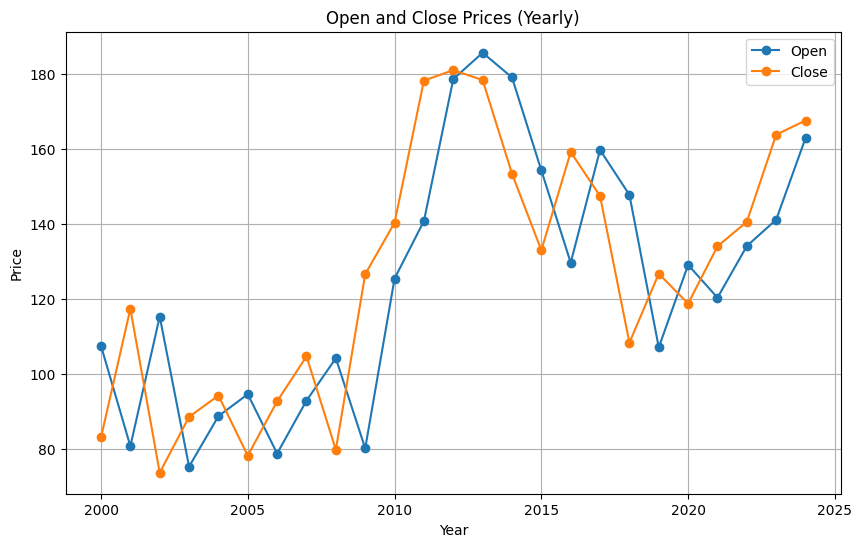

In [17]:
import matplotlib.pyplot as plt

df = pd.read_csv('IBM.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
yearly_ohlc = df['Open'].resample('Y').ohlc()

plt.figure(figsize=(10, 6))
plt.plot(yearly_ohlc.index.year, yearly_ohlc['open'], label='Open', marker='o')
plt.plot(yearly_ohlc.index.year, yearly_ohlc['close'], label='Close', marker='o')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Open and Close Prices (Yearly)')
plt.legend()
plt.grid(True)
plt.show()



# Task 5

Reconsider the `IBM.csv` file containing the IBM stocks values/day.  Consider a window of 1000 days and plot mean values.

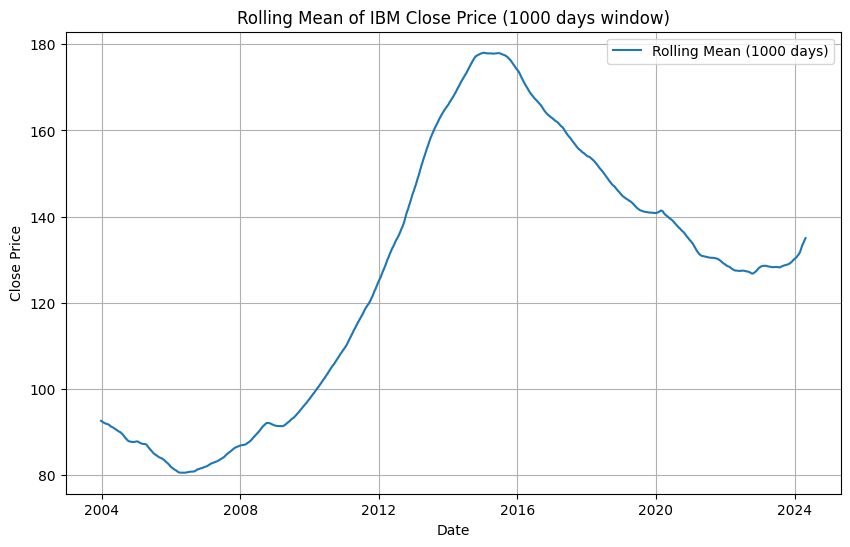

In [18]:
# Your solution goes here.
data = pd.read_csv("IBM.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
rolling_mean = data['Close'].rolling(window=1000).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, rolling_mean, label='Rolling Mean (1000 days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Rolling Mean of IBM Close Price (1000 days window)')
plt.legend()
plt.grid(True)
plt.show()

## Task 6

Reconsider the `IBM.csv` file containing the IBM stocks.  Consider a smoothing factor `alpha=0.01`, and plot the `ewm` average for the column `"Open"`, and the actual values in that column.

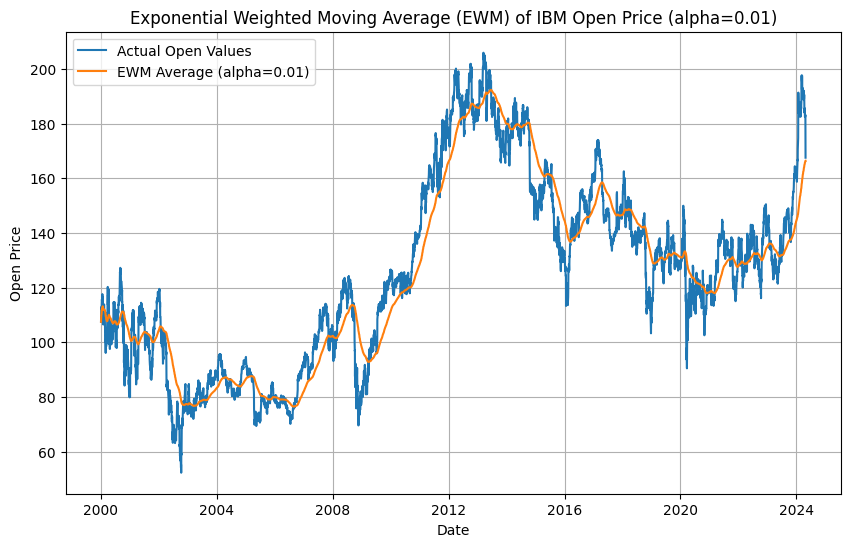

In [19]:
# Your solution goes here.
ewm_avg = data['Open'].ewm(alpha=0.01).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Open'], label='Actual Open Values')
plt.plot(df.index, ewm_avg, label='EWM Average (alpha=0.01)')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Exponential Weighted Moving Average (EWM) of IBM Open Price (alpha=0.01)')
plt.legend()
plt.grid(True)
plt.show()